In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import ttest_ind
from tabulate import tabulate
import random
import subprocess
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


colors_v1 = ['#1F77B4', '#FF7F0E', '#D62728', '#2CA02C', '#535154', 'black', '#F6C85F']
colors_v2 = ['#1064A0', '#9E172A', '#FB8C0A', '#117733', '#785F51', '#909392', '#F6C85F']

colors = colors_v1

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_2115733/630898095.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
accuracies = pd.read_csv("/media/SSD/paper_data/sakura/accuracies/accuracies_kfold_topk_averaged.csv")

In [3]:
datasets = list(accuracies.dataset.unique())
dataset_labels = [element.replace("nops", "N").replace("random", "R").replace("in", "IN").replace("out", "OUT") for element in datasets]

In [6]:
datasets

['Exp-in-nops', 'Exp-out1-nops', 'Exp-out1-random', 'Exp-out2-nops']

9.62135016918181
15.80459475517273
18.309730291366577
17.752972841262817


<Figure size 432x288 with 0 Axes>

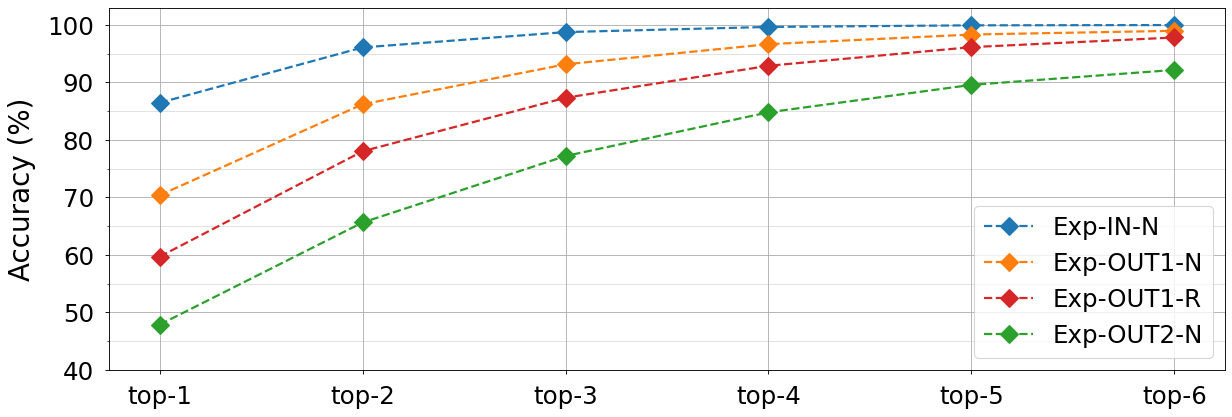

In [4]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.ylabel('Accuracy (%)', fontsize=25, labelpad=10)
plt.grid(visible=True, which='major')

minor_ticks = np.arange(45, 101, 10)
major_ticks = np.arange(40, 101, 10)

for dataset_id, dataset in enumerate(datasets):
    ax.plot(range(1, 7), 
            np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0], 
            color=colors[dataset_id], 
            linewidth='2',
            marker="D",
            markersize=12,
            linestyle='dashed',
            label=dataset_labels[dataset_id])   
    print(np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0][1]-np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0][0])

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_ylim([40, 103])

ax.set_xticks(range(1, 7), ['top-1', 'top-2', 'top-3', 'top-4', 'top-5', 'top-6']);

ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)

#plt.legend(loc='upper right', fontsize=18, ncol=7,edgecolor='black',bbox_to_anchor=(1.01, 1.14))
plt.legend(fontsize=22)

file_path = "/media/SSD/paper_data/plots/fig-topk-accuracy.pdf"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

In [5]:
np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0]

array([47.88972974, 65.64270258, 77.19405472, 84.79621649, 89.56594586,
       92.16567516])

9.62135016918181
15.80459475517273
18.309730291366577


<Figure size 432x288 with 0 Axes>

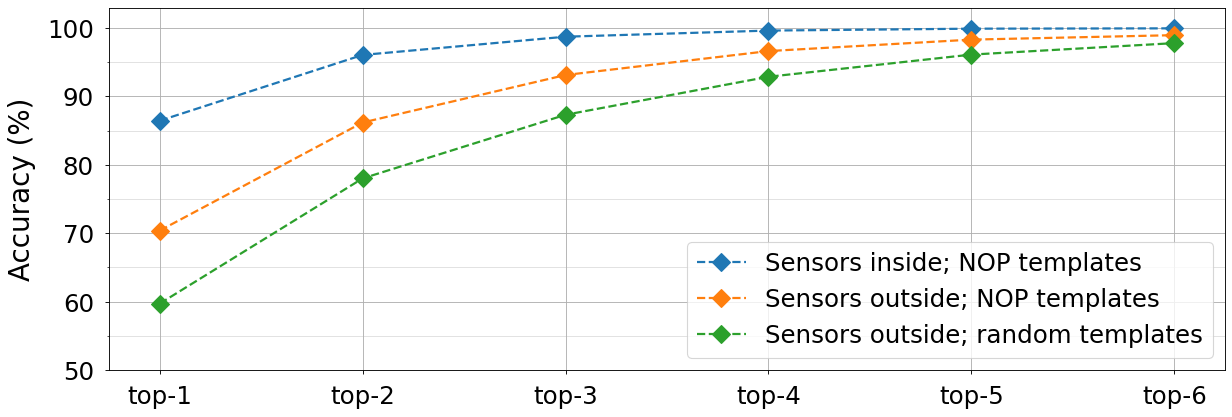

In [32]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.ylabel('Accuracy (%)', fontsize=25, labelpad=10)
plt.grid(visible=True, which='major')

minor_ticks = np.arange(55, 101, 10)
major_ticks = np.arange(50, 101, 10)

names = ['Sensors inside; NOP templates', 'Sensors outside; NOP templates', 'Sensors outside; random templates']
colors_tmp = ['#1F77B4', '#FF7F0E', '#2CA02C']

for dataset_id, dataset in enumerate(['Exp-in-nops', 'Exp-out1-nops', 'Exp-out1-random']):
    ax.plot(range(1, 7), 
            np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0], 
            color=colors_tmp[dataset_id], 
            linewidth='2',
            marker="D",
            markersize=12,
            linestyle='dashed',
            label=names[dataset_id])   
    print(np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0][1]-np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0][0])

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_ylim([50, 103])

ax.set_xticks(range(1, 7), ['top-1', 'top-2', 'top-3', 'top-4', 'top-5', 'top-6']);

ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)

#plt.legend(loc='upper right', fontsize=18, ncol=7,edgecolor='black',bbox_to_anchor=(1.01, 1.14))
plt.legend(fontsize=22, loc=4)

file_path = "/media/SSD/paper_data/plots/fig-topk-accuracy.png"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

15.80459475517273
18.309730291366577


<Figure size 432x288 with 0 Axes>

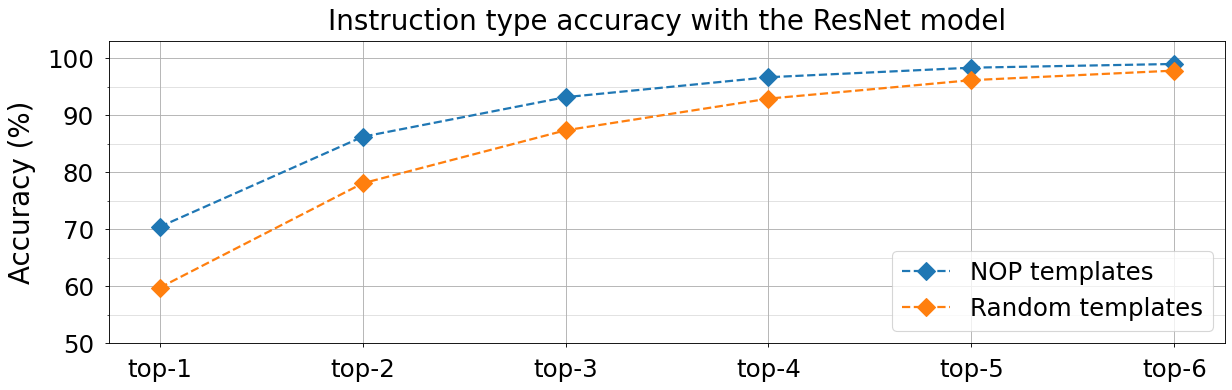

In [39]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.title('Instruction type accuracy with the ResNet model', fontsize=25, pad=10)
plt.ylabel('Accuracy (%)', fontsize=25, labelpad=10)
plt.grid(visible=True, which='major')

minor_ticks = np.arange(55, 101, 10)
major_ticks = np.arange(50, 101, 10)

names = ['NOP templates', 'Random templates']
colors_tmp = ['#1F77B4', '#FF7F0E', '#2CA02C']

for dataset_id, dataset in enumerate(['Exp-out1-nops', 'Exp-out1-random']):
    ax.plot(range(1, 7), 
            np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0], 
            color=colors_tmp[dataset_id], 
            linewidth='2',
            marker="D",
            markersize=12,
            linestyle='dashed',
            label=names[dataset_id])   
    print(np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0][1]-np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].iloc[:, 5:])[0][0])

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_ylim([50, 103])

ax.set_xticks(range(1, 7), ['top-1', 'top-2', 'top-3', 'top-4', 'top-5', 'top-6']);

ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)

#plt.legend(loc='upper right', fontsize=18, ncol=7,edgecolor='black',bbox_to_anchor=(1.01, 1.14))
plt.legend(fontsize=22, loc=4)

file_path = "/media/SSD/paper_data/plots/fig-topk-accuracy.png"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')